# Text Mining

1. Text mining, also known as text data mining or text analytics, is the process of extracting useful information and knowledge from unstructured text data. Unstructured text data refers to any text that does not have a predefined structure or format, such as emails, social media posts, articles, customer reviews, and more.

2. Text mining involves a combination of natural language processing (NLP) techniques, statistical methods, and machine learning algorithms to analyze and understand the content of textual data

# Problem statement 1:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)


## Importing libraries

In [12]:
# importing libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\Text mining assignment

18-01-2023  19:26    <DIR>          .
18-01-2023  19:26    <DIR>          ..
16-01-2023  14:57    <DIR>          .ipynb_checkpoints
15-01-2023  00:53               211 Assignment.txt
15-01-2023  00:53           170,848 Elon_musk.csv
15-01-2023  00:53            46,299 negative-words.txt
15-01-2023  00:53            20,630 positive-words.txt
15-01-2023  00:53             4,158 stop.txt
18-01-2023  19:26           105,001 Text Mining Assignment.ipynb
               6 File(s)        347,147 bytes
               3 Dir(s)  118,750,384,128 bytes free


## Reading File

In [14]:
# Reading the csv file
Elon = pd.read_csv('Elon_musk.csv',encoding='latin1')
Elon.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## EDA

In [15]:
# Shape of dataset
Elon.shape

(1999, 2)

In [16]:
# describing file
Elon.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [17]:
# information about file
Elon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [18]:
# checking for duplicate values
Elon.duplicated().sum()

0

In [19]:
Elon.value_counts()

Unnamed: 0  Text                                                                                                                                            
1           @kunalb11 Im an alien                                                                                                                              1
1329        @wintonARK True                                                                                                                                     1
1342        A la guerre comme à la guerre                                                                                                                       1
1341        @Erdayastronaut @PPathole @SpaceX Were pretty close to the manufacturing size limit for a milled copper &amp; steel ja
 https://t.co/T8d3yN4xRy    1
1340        @Teslarati Rawlinson didnt design Model S. Prototype was done before he joined &amp; he left us in the lurch just as t
 https://t.co/oy9yVM84xm    1
                                 

## Preprocessing Steps

### 1.Removing space and symbols

In [20]:
# removing space and symbol from text
Elon.Text=Elon.Text.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))  

In [21]:
Elon.Text.head()

0                                   kunalb Im an alien
1    IDAACarmack Ray tracing on Cyberpunk with HDR ...
2                     joerogan Spotify Great interview
3                         gtera Doge is underestimated
4    teslacn Congratulations Tesla China for amazin...
Name: Text, dtype: object

In [22]:
re.sub('[^a-zA-Z ]', "", "Are you %%%good!!!! ;") 

'Are you good '

In [23]:
Elon.head()

,Unnamed: 0,Text
0,1,kunalb Im an alien
1,2,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,3,joerogan Spotify Great interview
3,4,gtera Doge is underestimated
4,5,teslacn Congratulations Tesla China for amazin...


### 2.Convert into lower case

In [24]:
Elon.Text=Elon.Text.apply(lambda x: x.lower())

In [25]:
Elon.Text

0                                      kunalb im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                            gtera doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997               ppathole altho dumb and dumber is ufuf
1998                              progress update august 
Name: Text, Length: 1999, dtype: object

### 3.Splitting words from sentence

In [26]:
Elon.Text=Elon.Text.apply(lambda x: x.split())

In [27]:
Elon.head()

,Unnamed: 0,Text
0,1,"[kunalb, im, an, alien]"
1,2,"[idaacarmack, ray, tracing, on, cyberpunk, wit..."
2,3,"[joerogan, spotify, great, interview]"
3,4,"[gtera, doge, is, underestimated]"
4,5,"[teslacn, congratulations, tesla, china, for, ..."


### importing stopwards

In [31]:

import nltk   
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Sayali
[nltk_data]     Hatwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Stopwards of english
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### 4.Removing stopwards

In [33]:
Elon.Text=Elon.Text.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [34]:
Elon.Text.head()

0                                  [kunalb, im, alien]
1    [idaacarmack, ray, tracing, cyberpunk, hdr, ne...
2                [joerogan, spotify, great, interview]
3                        [gtera, doge, underestimated]
4    [teslacn, congratulations, tesla, china, amazi...
Name: Text, dtype: object

### 5.Stemming line

1. Stemming is a natural language processing technique used to reduce words to their base or root form, known as the "stem." 
2. The process involves removing suffixes and prefixes from words to obtain the core meaning or root of the word. Stemming is commonly used to normalize words in various applications, such as information retrieval, search engines, and text analysis.

In [35]:
ps = PorterStemmer()  
Elon.Text=Elon.Text.apply(lambda x: [ps.stem(word) for word in x])

In [36]:
Elon.Text.head()

0                                  [kunalb, im, alien]
1    [idaacarmack, ray, trace, cyberpunk, hdr, next...
2                [joerogan, spotifi, great, interview]
3                            [gtera, doge, underestim]
4    [teslacn, congratul, tesla, china, amaz, execu...
Name: Text, dtype: object

### 6.Rejoining

In [37]:
Elon.Text=Elon.Text.apply(lambda x: " ".join(x))

In [38]:
Elon.Text

0                                         kunalb im alien
1       idaacarmack ray trace cyberpunk hdr nextlevel tri
2                        joerogan spotifi great interview
3                                   gtera doge underestim
4       teslacn congratul tesla china amaz execut last...
                              ...                        
1994    flcnhvi true sound surreal neg propaganda stil...
1995    ppathol make sure read ur term amp condit clic...
1996                       teslagong ppathol samwis gamge
1997                       ppathol altho dumb dumber ufuf
1998                                progress updat august
Name: Text, Length: 1999, dtype: object

# Sentimental Analysis

Sentiment analysis is a natural language processing (NLP) technique used to determine the emotional tone or sentiment expressed in a piece of text. It involves using machine learning and linguistic techniques to classify the sentiment of a text as positive, negative, neutral, or sometimes more fine-grained emotions like happy, sad, angry, etc.

In [39]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [40]:
# analysing the statement
from textblob import TextBlob
Elon['sentiment'] = Elon['Text'].apply(lambda x:TextBlob(x).sentiment[0] )
Elon[['Text','sentiment']].head()
# TextBlob(x).sentiment[0]=sentiment[1]=negative and positive[0] and only positive is[1]

,Text,sentiment
0,kunalb im alien,-0.25
1,idaacarmack ray trace cyberpunk hdr nextlevel tri,0.00
2,joerogan spotifi great interview,0.80
3,gtera doge underestim,0.00
4,teslacn congratul tesla china amaz execut last...,0.00


In [41]:
Elon.sentiment

0      -0.250000
1       0.000000
2       0.800000
3       0.000000
4       0.000000
          ...   
1994    0.186667
1995    0.500000
1996    0.000000
1997   -0.375000
1998    0.000000
Name: sentiment, Length: 1999, dtype: float64

# Problem statement 2:

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining


## Importing libraries

In [42]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
from bs4 import BeautifulSoup


## Scraping reviews using BeautifulSoup

In [43]:
# Review of pregnancy cloths
link="https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [44]:
# function showing all review list
review_list=[]

for k in range(0,7):
    review_link=link+'&pageNumber='+str(k)
    print(review_link)
    page=requests.get(review_link)
    soup=BeautifulSoup(page.content,'html.parser')
    reviews=soup.find_all('span',class_='review-text-content')
    
    for i in range(0,len(reviews)):
        
        review_list.append(reviews[i].get_text().strip())
        

https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=0
https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=1
https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=2
https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=3
https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber=4
https://www.amazon.in/MomToBe-Maternity-Pregnancy-Breastfeeding-Pregnancy/product-reviews/B08Y6VHLR9/ref=cm_cr_dp_d_show_all_

In [45]:
# Reviews
review_list

['Colour was dark as shown in figure. fitting was also good . most importantly very comfortable to wear.',
 'Very good material, dress is as shown in the picture',
 'Beautiful 😍',
 'Not like the product. SO MANY TIME AAPKIED FOR RETURN BUT NO ONE IS COMING TO RECEVIE. They shown on site that price tag is missing.I was added the photo where price tag is as it is.',
 'Comfortable for feeding looks classy',
 'The material of the dress is very good. Quality and design also good. I bought it for my pregnancy period and shall be using as maternity dress also.',
 'Rest of the dress is fine and fitting okay. But the side pocket that was promised in the photos is missing. I definitely won’t buy more from this vendor.']

In [46]:
# length of review
len(review_list)

7

In [66]:
# Making daraframe
review_df=pd.DataFrame({'Reviews':review_list})
pd.set_option('max_colwidth', 500)
review_df

,Reviews
0,Colour was dark as shown in figure. fitting was also good . most importantly very comfortable to wear.
1,"Very good material, dress is as shown in the picture"
2,Beautiful 😍
3,Not like the product. SO MANY TIME AAPKIED FOR RETURN BUT NO ONE IS COMING TO RECEVIE. They shown on site that price tag is missing.I was added the photo where price tag is as it is.
4,Comfortable for feeding looks classy
5,The material of the dress is very good. Quality and design also good. I bought it for my pregnancy period and shall be using as maternity dress also.
6,Rest of the dress is fine and fitting okay. But the side pocket that was promised in the photos is missing. I definitely won’t buy more from this vendor.


## Proprocessing Steps

### 1.Removing space and symbols

In [67]:
review_df.Reviews=review_df.Reviews.apply(lambda x: re.sub('[^a-zA-Z ]', "", x))

In [68]:
review_df

,Reviews
0,Colour was dark as shown in figure fitting was also good most importantly very comfortable to wear
1,Very good material dress is as shown in the picture
2,Beautiful
3,Not like the product SO MANY TIME AAPKIED FOR RETURN BUT NO ONE IS COMING TO RECEVIE They shown on site that price tag is missingI was added the photo where price tag is as it is
4,Comfortable for feeding looks classy
5,The material of the dress is very good Quality and design also good I bought it for my pregnancy period and shall be using as maternity dress also
6,Rest of the dress is fine and fitting okay But the side pocket that was promised in the photos is missing I definitely wont buy more from this vendor


### 2.Converting words to lower case

In [69]:
review_df.Reviews=review_df.Reviews.apply(lambda x: x.lower())

In [70]:
review_df

,Reviews
0,colour was dark as shown in figure fitting was also good most importantly very comfortable to wear
1,very good material dress is as shown in the picture
2,beautiful
3,not like the product so many time aapkied for return but no one is coming to recevie they shown on site that price tag is missingi was added the photo where price tag is as it is
4,comfortable for feeding looks classy
5,the material of the dress is very good quality and design also good i bought it for my pregnancy period and shall be using as maternity dress also
6,rest of the dress is fine and fitting okay but the side pocket that was promised in the photos is missing i definitely wont buy more from this vendor


### 3.Splitting word from sentence

In [71]:
review_df.Reviews=review_df.Reviews.apply(lambda x: x.split())

In [72]:
review_df

,Reviews
0,"[colour, was, dark, as, shown, in, figure, fitting, was, also, good, most, importantly, very, comfortable, to, wear]"
1,"[very, good, material, dress, is, as, shown, in, the, picture]"
2,[beautiful]
3,"[not, like, the, product, so, many, time, aapkied, for, return, but, no, one, is, coming, to, recevie, they, shown, on, site, that, price, tag, is, missingi, was, added, the, photo, where, price, tag, is, as, it, is]"
4,"[comfortable, for, feeding, looks, classy]"
5,"[the, material, of, the, dress, is, very, good, quality, and, design, also, good, i, bought, it, for, my, pregnancy, period, and, shall, be, using, as, maternity, dress, also]"
6,"[rest, of, the, dress, is, fine, and, fitting, okay, but, the, side, pocket, that, was, promised, in, the, photos, is, missing, i, definitely, wont, buy, more, from, this, vendor]"


In [73]:
# importing stopward and stemmer
import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer 

[nltk_data] Downloading package stopwords to C:\Users\Sayali
[nltk_data]     Hatwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.Removing stop words

In [74]:
review_df.Reviews=review_df.Reviews.apply(lambda x: [word  for word in x if word not in set(stopwords.words('english'))])

In [75]:
review_df

,Reviews
0,"[colour, dark, shown, figure, fitting, also, good, importantly, comfortable, wear]"
1,"[good, material, dress, shown, picture]"
2,[beautiful]
3,"[like, product, many, time, aapkied, return, one, coming, recevie, shown, site, price, tag, missingi, added, photo, price, tag]"
4,"[comfortable, feeding, looks, classy]"
5,"[material, dress, good, quality, design, also, good, bought, pregnancy, period, shall, using, maternity, dress, also]"
6,"[rest, dress, fine, fitting, okay, side, pocket, promised, photos, missing, definitely, wont, buy, vendor]"


### 5. Stemming line

In [76]:
ps = PorterStemmer()  
review_df.Reviews=review_df.Reviews.apply(lambda x: [ps.stem(word) for word in x])

In [77]:
review_df

,Reviews
0,"[colour, dark, shown, figur, fit, also, good, importantli, comfort, wear]"
1,"[good, materi, dress, shown, pictur]"
2,[beauti]
3,"[like, product, mani, time, aapki, return, one, come, recevi, shown, site, price, tag, missingi, ad, photo, price, tag]"
4,"[comfort, feed, look, classi]"
5,"[materi, dress, good, qualiti, design, also, good, bought, pregnanc, period, shall, use, matern, dress, also]"
6,"[rest, dress, fine, fit, okay, side, pocket, promis, photo, miss, definit, wont, buy, vendor]"


### 6.Rejoining

In [78]:
review_df.Reviews=review_df.Reviews.apply(lambda x: " ".join(x))

In [79]:
review_df

,Reviews
0,colour dark shown figur fit also good importantli comfort wear
1,good materi dress shown pictur
2,beauti
3,like product mani time aapki return one come recevi shown site price tag missingi ad photo price tag
4,comfort feed look classi
5,materi dress good qualiti design also good bought pregnanc period shall use matern dress also
6,rest dress fine fit okay side pocket promis photo miss definit wont buy vendor


# Sentiment Analysis

In [80]:
# loading vader_lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Sayali
[nltk_data]     Hatwar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
# Applying sentiment intensity analyzer
from nltk.sentiment import SentimentIntensityAnalyzer
si_obj = SentimentIntensityAnalyzer()

In [82]:
# Function for sentiment score
def sentiment_score(text):
    score=si_obj.polarity_scores(text)
    return score['compound']

In [83]:
# applying sentimental score
review_df['sentiment_score'] = review_df['Reviews'].apply(lambda x:sentiment_score(x))

In [84]:
# new column with sentiment score
pd.set_option('max_colwidth', 500)
review_df.head()

,Reviews,sentiment_score
0,colour dark shown figur fit also good importantli comfort wear,0.7845
1,good materi dress shown pictur,0.4404
2,beauti,0.0000
3,like product mani time aapki return one come recevi shown site price tag missingi ad photo price tag,0.3612
4,comfort feed look classi,0.3612


In [85]:
# Function for sentiment category
def sentiment_category(score1):
    if(score1 > 0.4):
        return 'Positive'
    elif(score1 < .1):
        return 'Negative'
    else:
        return 'Neutral'

In [86]:
# Applying sentiment category
review_df['sentiment'] = review_df['sentiment_score'].apply(lambda x:sentiment_category(x))

In [87]:
review_df

,Reviews,sentiment_score,sentiment
0,colour dark shown figur fit also good importantli comfort wear,0.7845,Positive
1,good materi dress shown pictur,0.4404,Positive
2,beauti,0.0000,Negative
3,like product mani time aapki return one come recevi shown site price tag missingi ad photo price tag,0.3612,Neutral
4,comfort feed look classi,0.3612,Neutral
5,materi dress good qualiti design also good bought pregnanc period shall use matern dress also,0.7003,Positive
6,rest dress fine fit okay side pocket promis photo miss definit wont buy vendor,0.5574,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

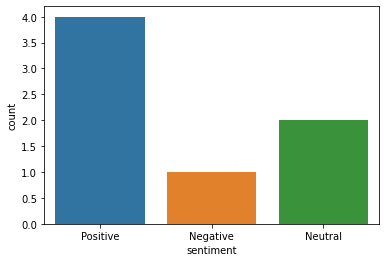

In [88]:
# Plotting countplot for sentiment
sns.countplot(x=review_df['sentiment'])